# Notes to self 
1. Build a Q and A system? 
2. 80% of value comes from 20% of comments 

## Course List 
* [Google Course](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight?specialization=google-advanced-data-analytics#modules)
* [Google Course](https://www.coursera.org/professional-certificates/google-business-intelligence#courses )
* [Get started with Python](https://www.coursera.org/learn/get-started-with-python?specialization=google-advanced-data-analytics#modules)

### Reddit Notes 

- you should be coming up with your hypothesis **first** and then finding the right data and analyzing and visualizing it.

1. What Problem are we tring to solve 
2. What does success look like 
3. what does failure look like 
4. what trends are important 
5. what drives the trend 
6. if trend is negative how can we fix it? 

`something like __ went up or __ went down is not insight, it's commentary`

There should be something that creates tension or unexpected. 
For instance, why are there more aspirational comments? maybe I should drop certain comments that are super small  

# Hypothesis and Questions? 
what are the fears,frustrations of my aspirations and how can i use that information to help them with productivity club?

# Imports 

In [10]:
import seaborn as sns 
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [11]:
df = pd.read_csv('datasets/analysis.csv')

<!-- ? possibly walk him through the columns here  -->

In [12]:
# walk him through columns here 
df.head()

,title,split_comments,reordered_scores,reordered_labels,sentiment
0,How to Build Your Ultimate Productivity System,how to remember the system then?,"[0.20157860219478607, 0.34655919671058655, 0.45186224579811096]","['fears', 'frustrations', 'aspirations']",neutral
1,How to Build Your Ultimate Productivity System,"15/3/24, x2.","[0.3612099289894104, 0.26915282011032104, 0.36963728070259094]","['fears', 'frustrations', 'aspirations']",neutral
2,How to Build Your Ultimate Productivity System,thanks brother it's helping video :red_heart::party_popper:,"[0.14195847511291504, 0.17578278481960297, 0.6822587251663208]","['fears', 'frustrations', 'aspirations']",positive
3,How to Build Your Ultimate Productivity System,you should try breathing and just being in the moment while you are in the toilet. :grinning_squinting_face:,"[0.19090235233306885, 0.4940927028656006, 0.31500494480133057]","['fears', 'frustrations', 'aspirations']",neutral
4,How to Build Your Ultimate Productivity System,took me out when he said “my brain is a dumass” :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:,"[0.0920601338148117, 0.8241838812828064, 0.08375602215528488]","['fears', 'frustrations', 'aspirations']",negative


# Basic Preprocessing 

In [13]:
# no null values 
df.isna().sum()

title               0
split_comments      0
reordered_scores    0
reordered_labels    0
sentiment           0
dtype: int64

In [14]:
df.rename(columns={
    'split_comments': 'comments',
    'reordered_scores': 'scores',
    'reordered_labels': 'labels'
}, inplace=True)

In [15]:
df['scores'] = df['scores'].apply((lambda x: ast.literal_eval(x)))

In [16]:
df['labels'] = df['labels'].apply(ast.literal_eval)

In [17]:

# Extract each score into a separate column and round to 4 digits
df['fears_score'] = df['scores'].apply(lambda x: round(x[0], 4))
df['frustrations_score'] = df['scores'].apply(lambda x: round(x[1], 4))
df['aspirations_score'] = df['scores'].apply(lambda x: round(x[2], 4))

# Visualisations 

## High Level Visualisations

### Overall Sentiment

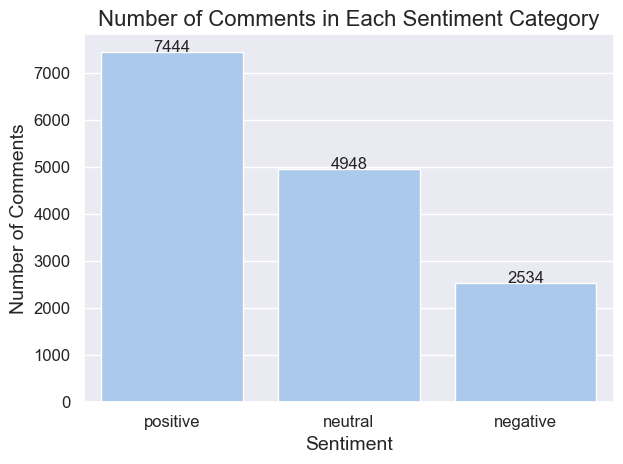

In [15]:

# Create a color palette for the bars
sns.color_palette("Spectral")
sns.set_style("darkgrid")
sns.barplot(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts().values)
# Add the number of comments on top of each bar
for index, value in enumerate(df['sentiment'].value_counts().values):
    plt.text(index, value, str(value), ha='center')

# Set labels and title with increased font size
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.title('Number of Comments in Each Sentiment Category', fontsize=16)

# Increase the size of the ticks on both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



### Distribution Of Each Sentiment 

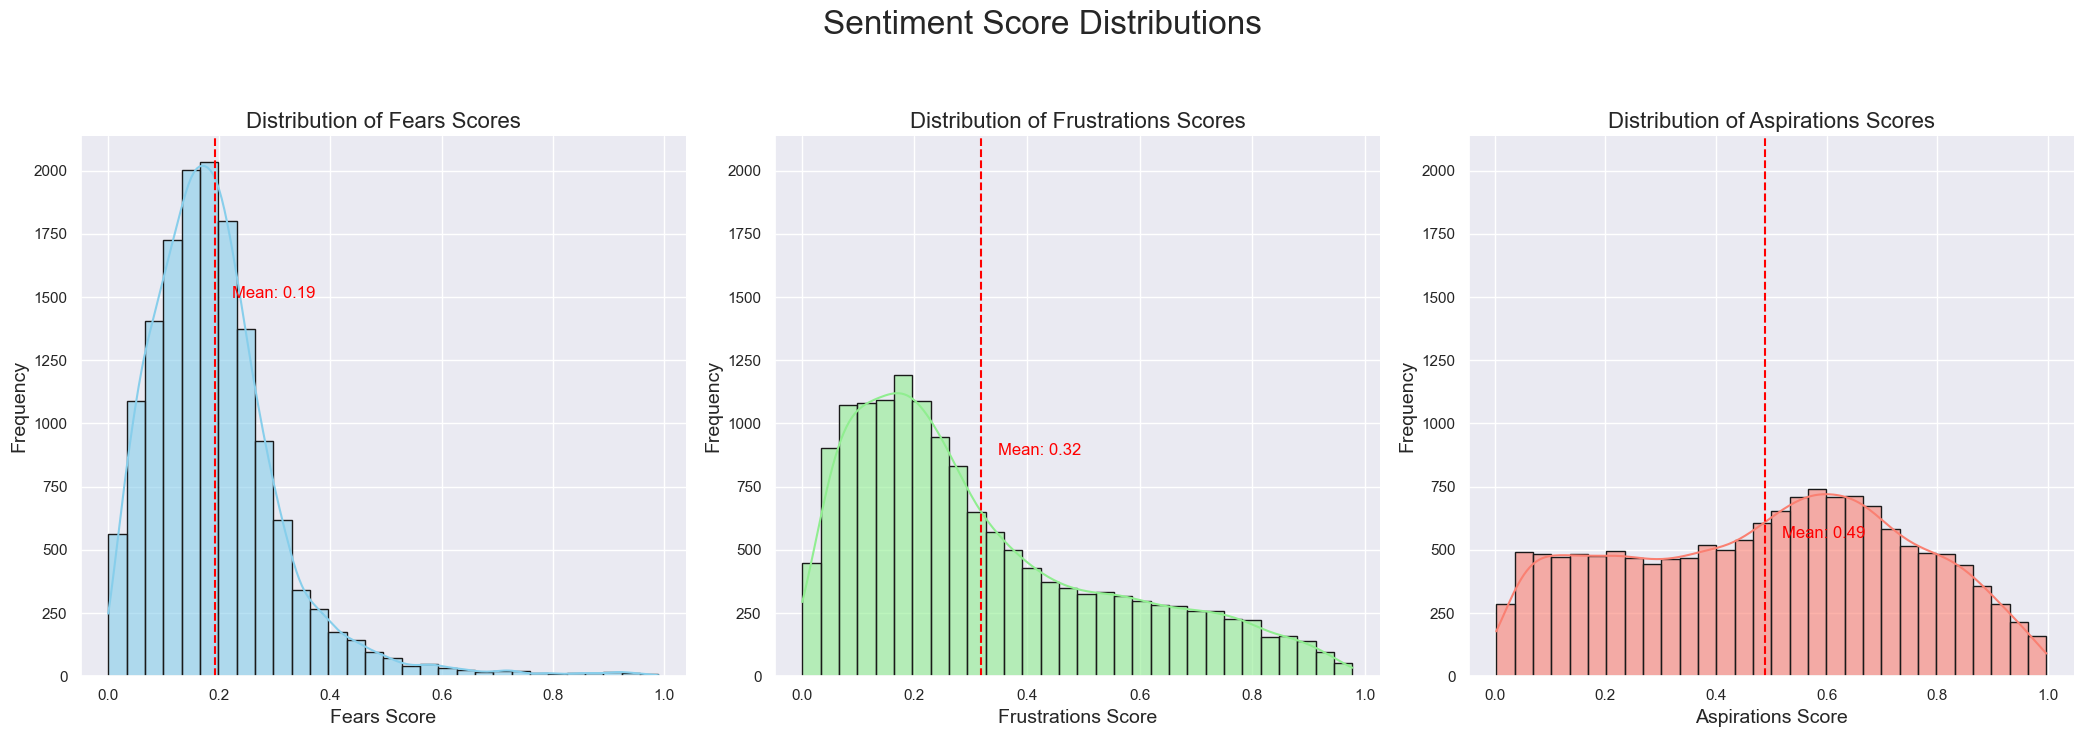

In [17]:
sns.set_theme(style='darkgrid',palette="pastel")
# Increase the figure size for better readability
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# Customize the histograms and KDE plots
for i, (ax, score, color, title) in enumerate(zip(axes,
                                                  ['fears_score', 'frustrations_score', 'aspirations_score'],
                                                  ['skyblue', 'lightgreen', 'salmon'],
                                                  ['Fears', 'Frustrations', 'Aspirations'])):
    sns.histplot(df[score], bins=30, kde=True, ax=ax,color=color,  alpha=0.6, edgecolor="k")
    ax.set_title(f'Distribution of {title} Scores', fontsize=16)
    ax.set_xlabel(f'{title} Score', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True)  # Add grid lines for better readability

    # Add the mean score line
    mean_score = df[score].mean()
    ax.axvline(mean_score, color='red', linestyle='--')
    ax.text(mean_score + 0.03, ax.get_ylim()[1] * 0.7, f'Mean: {mean_score:.2f}', color='red')

# Remove the top and right axes spines for a cleaner look
for ax in axes:
    sns.despine(ax=ax)

# Standardize the y-axis across plots to make them easier to compare
max_ylim = max(ax.get_ylim()[1] for ax in axes)
for ax in axes:
    ax.set_ylim(0, max_ylim)

# Add a suptitle to the figure
fig.suptitle('Sentiment Score Distributions', fontsize=24, y=1.05)

# Adjust layout to fit everything cleanly
plt.tight_layout()

# Show the plot
plt.show()

* Viewers are more likely to express aspirations
  * In terms of how to talk to viewers you may want to show them how much your productivity advice can benfit them instead of talking about what would happen if they weren't productive 
> Caveat to this address in the running lean section about **loss aversion**

In [18]:
group_by_label = df.groupby('title')

In [19]:
# Calculate the proportion of comments in each category for each video
score_analysis = group_by_label[['fears_score', 'frustrations_score', 'aspirations_score']].mean()

In [20]:

# Reset the index to make 'title' a regular column
score_analysis = score_analysis.reset_index()

In [21]:

# Sort by one of the categories for visualization
video_analysis_sorted = score_analysis.sort_values(by='fears_score', ascending=False)

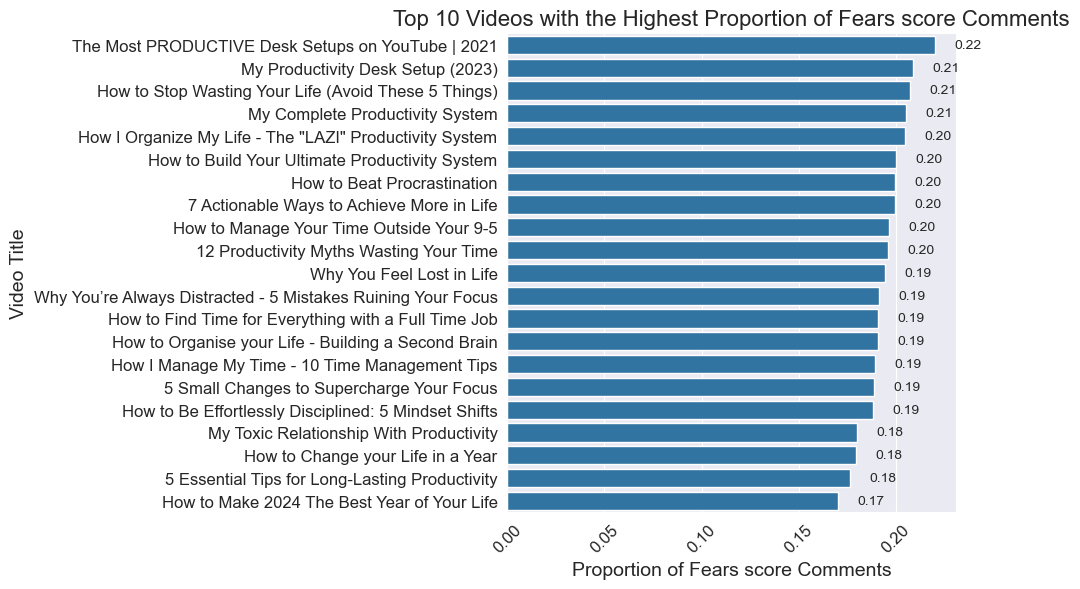

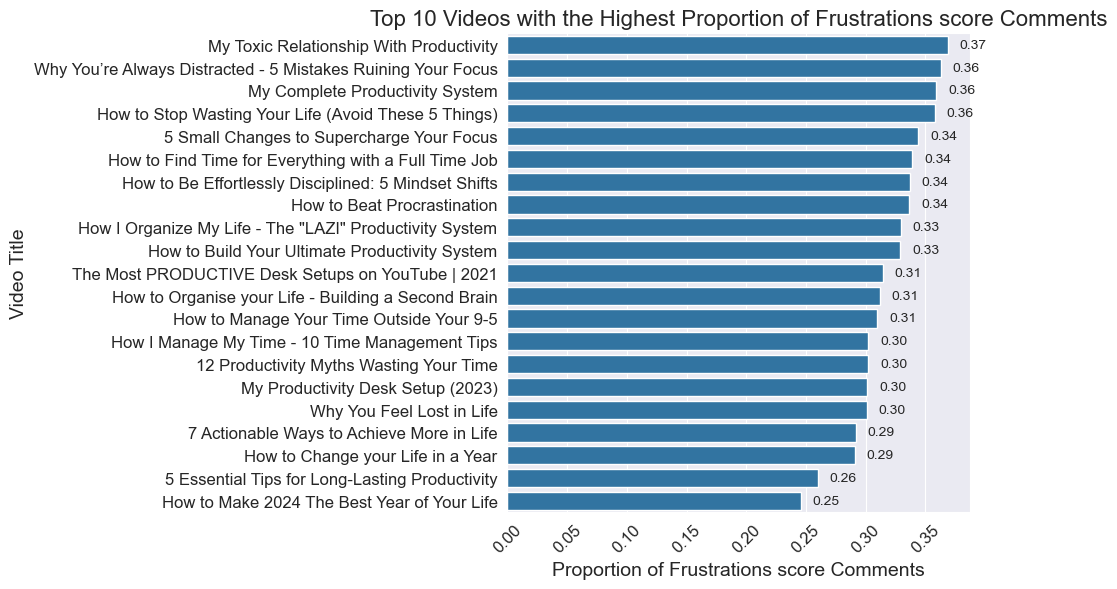

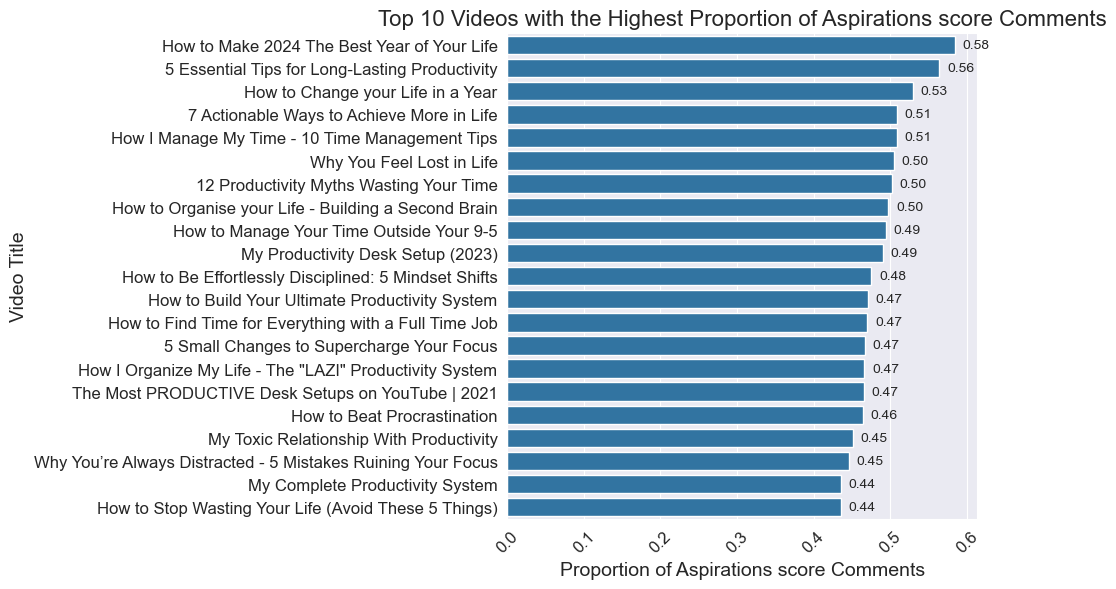

In [22]:
sns.set_style(style="darkgrid")
# sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# List of scores to plot
scores = ['fears_score', 'frustrations_score', 'aspirations_score']

for score in scores:
    # Sort the DataFrame by the current score
    video_analysis_sorted = score_analysis.sort_values(by=score, ascending=False)
     # Create the plot
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=video_analysis_sorted, x=score, y='title')

    # Add the score values on the bars
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width + 0.01, p.get_y() + p.get_height() / 2,
                 '{:1.2f}'.format(width),
                 ha='left', va='center')
        
    # Set the title, labels, and tick font sizes
    plt.title(f'Top 10 Videos with the Highest Proportion of {score.replace("_", " ").capitalize()} Comments', fontsize=16)
    plt.xlabel(f'Proportion of {score.replace("_", " ").capitalize()} Comments', fontsize=14)
    plt.ylabel('Video Title', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

## Analysis of the 2 videos in the aspiration category 

In [24]:
top_videos = [
    'How to Make 2024 The Best Year of Your Life', 
    '5 Essential Tips For Long Lasting Productivity'
]

In [25]:

aspirational_video = df[df['title'].isin(top_videos)]

In [27]:
# rank by aspiration score 
aspirational_video.sort_values(by='aspirations_score',ascending=False).iloc[0]

title                                        How to Make 2024 The Best Year of Your Life
comments                                                           inspiring :red_heart:
scores                [0.0030877478420734406, 0.0032842152286320925, 0.9936280846595764]
labels                                                [fears, frustrations, aspirations]
sentiment                                                                       positive
fears_score                                                                       0.0031
frustrations_score                                                                0.0033
aspirations_score                                                                 0.9936
Name: 12275, dtype: object

In [36]:
df.head(2)

,title,comments,scores,labels,sentiment,fears_score,frustrations_score,aspirations_score
0,How to Build Your Ultimate Productivity System,how to remember the system then?,"[0.20157860219478607, 0.34655919671058655, 0.45186224579811096]","[fears, frustrations, aspirations]",neutral,0.2016,0.3466,0.4519
1,How to Build Your Ultimate Productivity System,"15/3/24, x2.","[0.3612099289894104, 0.26915282011032104, 0.36963728070259094]","[fears, frustrations, aspirations]",neutral,0.3612,0.2692,0.3696


In [35]:
len(df.query('aspirations_score > 0.50'))

7725

- people cannot seem to figure out how to develop categories in their life
    - check `aspirational_video.loc[11809]`
- people have inaccurate estimates about how long something will take 

## Distribution Of Sentiment

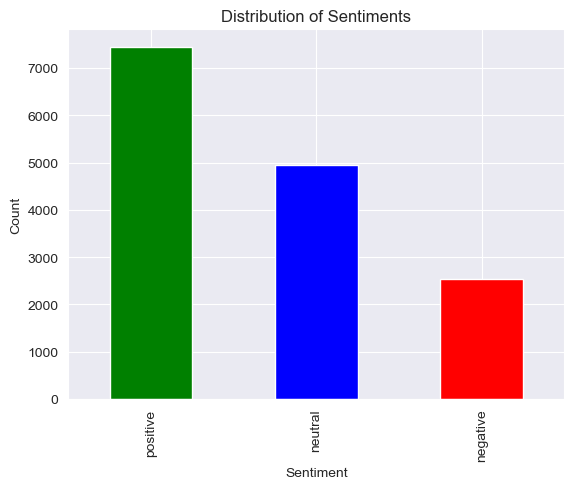

In [42]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

## Score Distribution 

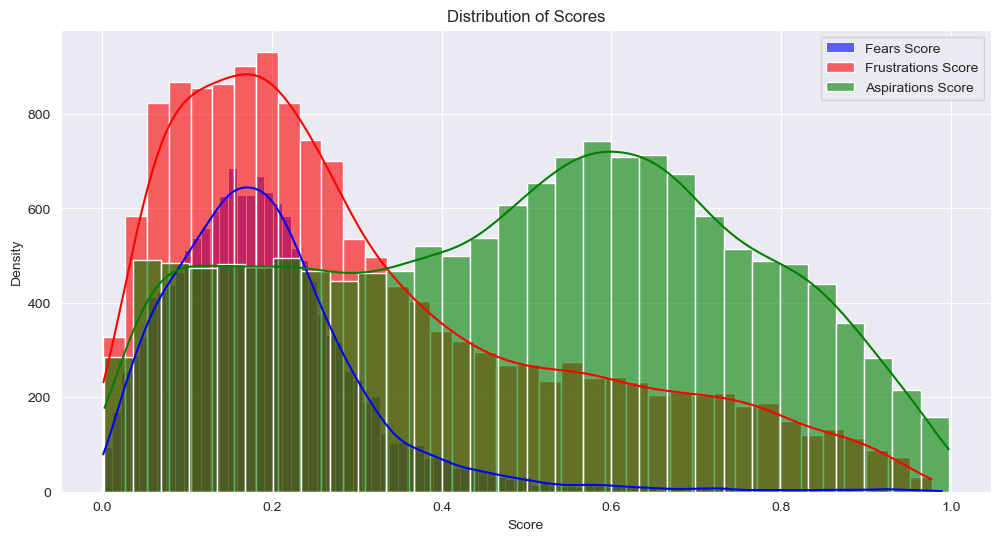

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(df['fears_score'], kde=True, color='blue', label='Fears Score', alpha=0.6)
sns.histplot(df['frustrations_score'], kde=True, color='red', label='Frustrations Score', alpha=0.6)
sns.histplot(df['aspirations_score'], kde=True, color='green', label='Aspirations Score', alpha=0.6)
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of Scores')
plt.legend()
plt.show()

### Sentiment v/s scores 

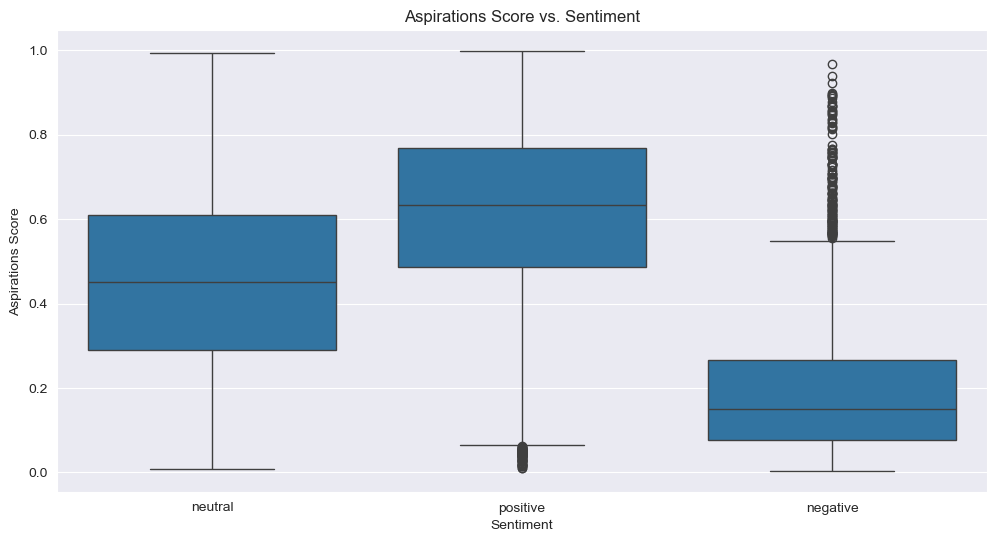

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='aspirations_score', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Aspirations Score')
plt.title('Aspirations Score vs. Sentiment')
plt.show()

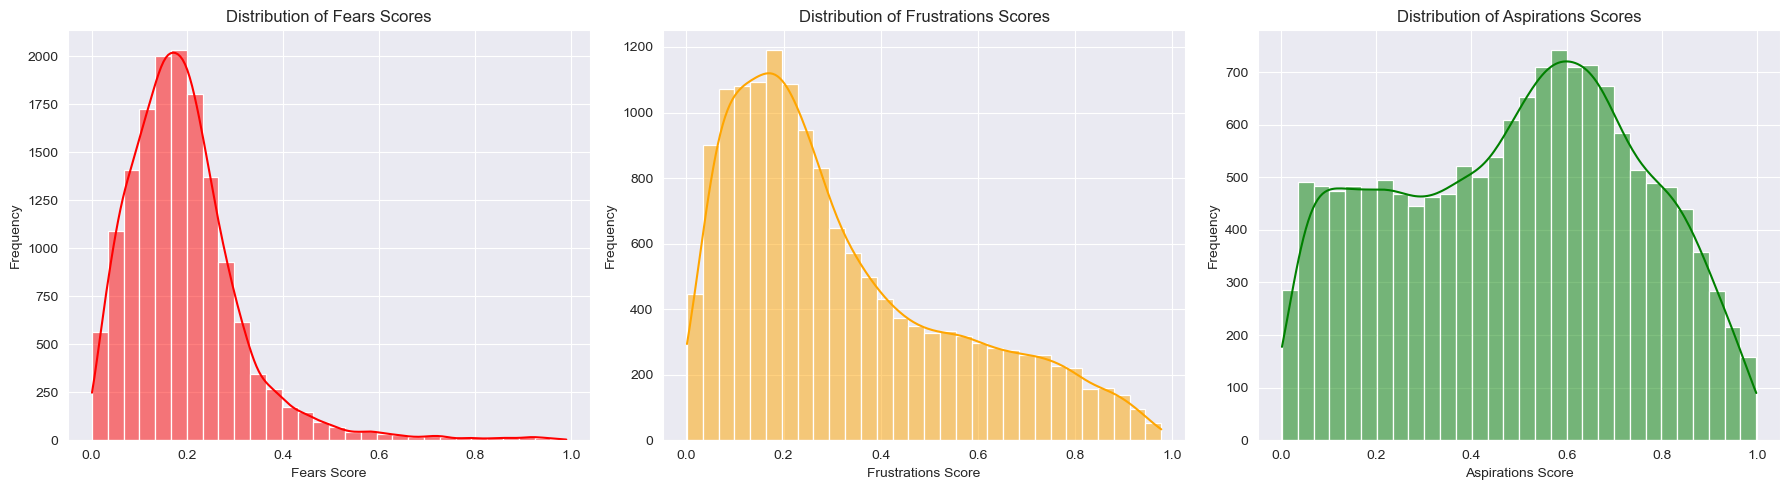

In [49]:

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot histograms for each score
sns.histplot(df['fears_score'], bins=30, kde=True, ax=axes[0], color='red')
axes[0].set_title('Distribution of Fears Scores')
axes[0].set_xlabel('Fears Score')
axes[0].set_ylabel('Frequency')

sns.histplot(df['frustrations_score'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Frustrations Scores')
axes[1].set_xlabel('Frustrations Score')
axes[1].set_ylabel('Frequency')

sns.histplot(df['aspirations_score'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Aspirations Scores')
axes[2].set_xlabel('Aspirations Score')
axes[2].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

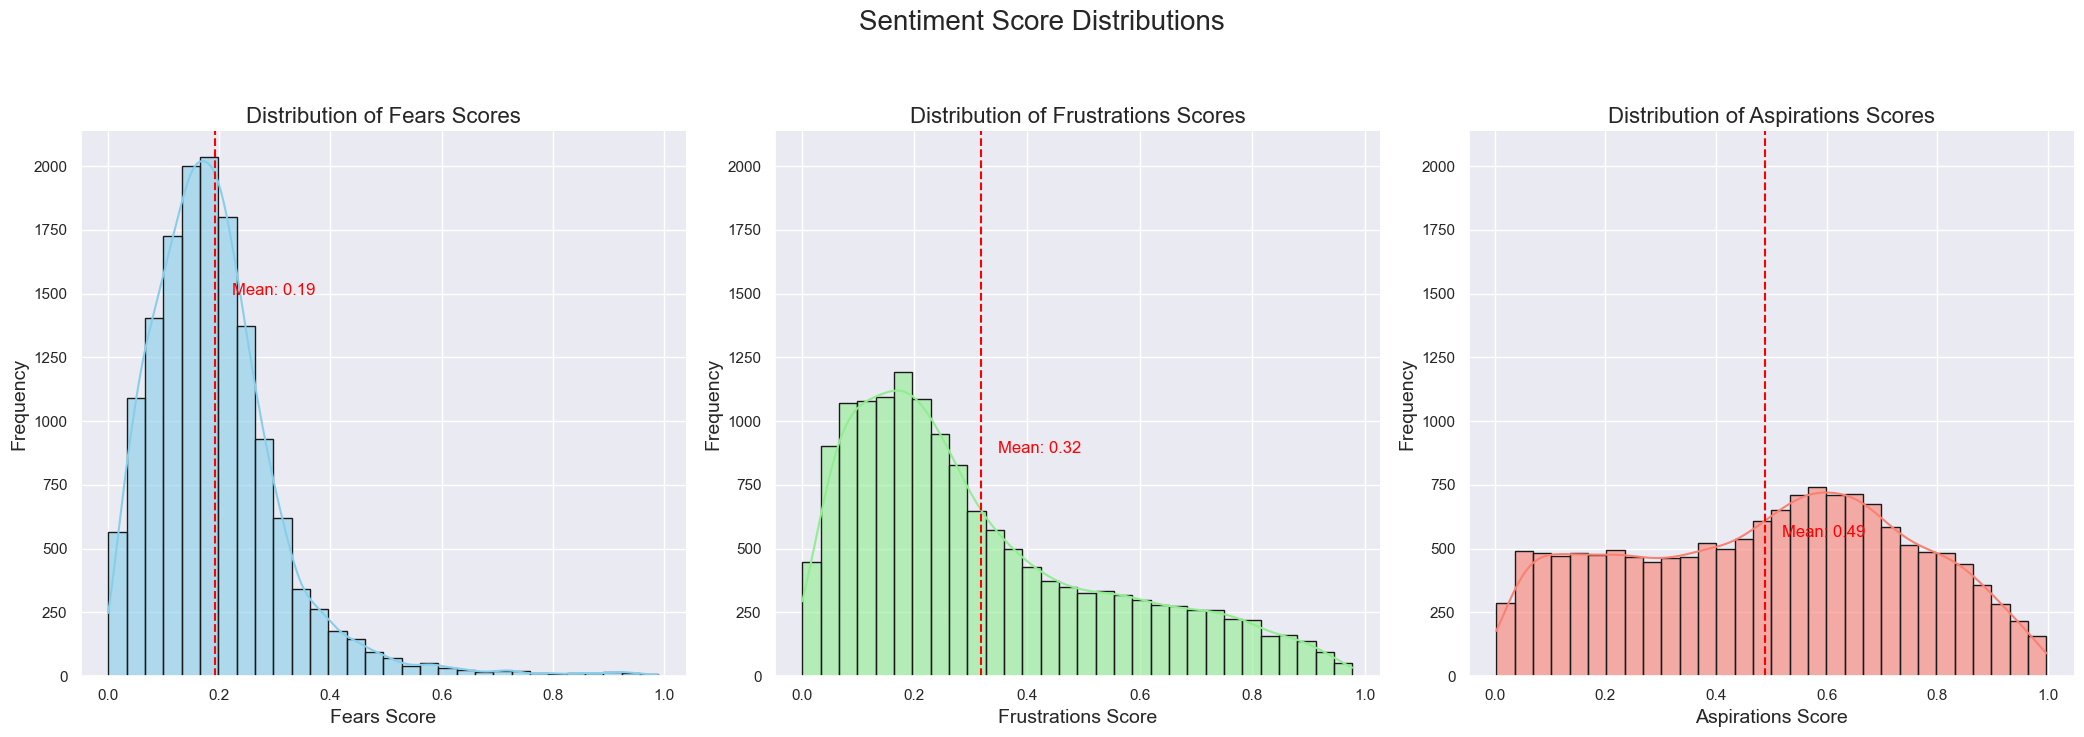

# Rank Data by fears frustrations aspirations

In [61]:
# fears = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[0]), ascending=False)
# frustrations = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[1]), ascending=False)
aspirations = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[2]), ascending=False)


# Analysis 

In [62]:
# Preprocess the text useful
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    return text

In [63]:
# fears = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[0]), ascending=False)
# frustrations = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[1]), ascending=False)
aspirations = df.sort_values(by='scores', key=lambda x: x.apply(lambda y: y[2]), ascending=False)

## Analyse Aspirations 

In [69]:
# aspirations.head()


# Insights from GPT 
Personal Growth and Self-Improvement: Many viewers mention being inspired or finding the content motivating. They express a desire to start their dreams, suggesting they want guidance on self-improvement and achieving personal goals.

Productivity and Achievement: Comments include specific goals such as getting into shape, learning new languages, and creating productive systems. This shows a yearning for methods to enhance productivity and achieve set objectives.

Content Creation: There are aspirations related to creating YouTube videos and other content, indicating a wish to engage in creative endeavors and perhaps build a personal brand or channel.

Learning and Education: Some comments express an aspiration to read more books, suggesting a value placed on learning and education.

Health and Fitness Goals: Comments like wanting to get into the best shape of their life and becoming a Gymshark athlete point to aspirations for health and fitness achievements.

Professional Success: Aspirations like aiming for a net worth goal before a certain age or becoming successful in a chosen field show that viewers are looking for advice and inspiration to succeed professionally.

Technology and Future Predictions: A few comments hint at an interest in technology and its evolution, indicating an aspiration to be informed about or involved in tech advancements.

Spiritual and Philosophical Goals: Comments about spiritual chanting and finding happiness point to aspirations for spiritual growth and understanding life's deeper meanings.

Relationship and Social Goals: There are aspirations to meet you, indicating a desire for connection and perhaps mentorship or collaboration.

Financial Aspirations: Goals like financial freedom suggest that your viewers are seeking advice on financial growth and stability.

In [19]:
x = df.copy()

In [21]:
# ! drop emojis 
x

,title,comments,scores,labels,sentiment,fears_score,frustrations_score,aspirations_score,comments_length
0,How to Build Your Ultimate Productivity System,how to remember the system then?,"[0.20157860219478607, 0.34655919671058655, 0.45186224579811096]","[fears, frustrations, aspirations]",neutral,0.2016,0.3466,0.4519,32
1,How to Build Your Ultimate Productivity System,"15/3/24, x2.","[0.3612099289894104, 0.26915282011032104, 0.36963728070259094]","[fears, frustrations, aspirations]",neutral,0.3612,0.2692,0.3696,12
2,How to Build Your Ultimate Productivity System,thanks brother it's helping video :red_heart::party_popper:,"[0.14195847511291504, 0.17578278481960297, 0.6822587251663208]","[fears, frustrations, aspirations]",positive,0.1420,0.1758,0.6823,59
3,How to Build Your Ultimate Productivity System,you should try breathing and just being in the moment while you are in the toilet. :grinning_squinting_face:,"[0.19090235233306885, 0.4940927028656006, 0.31500494480133057]","[fears, frustrations, aspirations]",neutral,0.1909,0.4941,0.3150,109
4,How to Build Your Ultimate Productivity System,took me out when he said “my brain is a dumass” :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:,"[0.0920601338148117, 0.8241838812828064, 0.08375602215528488]","[fears, frustrations, aspirations]",negative,0.0921,0.8242,0.0838,120
...,...,...,...,...,...,...,...,...,...
14921,5 Small Changes to Supercharge Your Focus,please also upload hindi video,"[0.3803737759590149, 0.29799097776412964, 0.32163533568382263]","[fears, frustrations, aspirations]",neutral,0.3804,0.2980,0.3216,30
14922,5 Small Changes to Supercharge Your Focus,im 3rd,"[0.17630787193775177, 0.18799357116222382, 0.6356985569000244]","[fears, frustrations, aspirations]",neutral,0.1763,0.1880,0.6357,6
14923,5 Small Changes to Supercharge Your Focus,what if he pinned my cmt?:grinning_face_with_sweat:,"[0.5885409116744995, 0.3420863449573517, 0.06937270611524582]","[fears, frustrations, aspirations]",neutral,0.5885,0.3421,0.0694,51
14924,5 Small Changes to Supercharge Your Focus,first to comment,"[0.28964871168136597, 0.2726641297340393, 0.4376871585845947]","[fears, frustrations, aspirations]",neutral,0.2896,0.2727,0.4377,16


In [22]:
def remove_emojis(text): return re.sub(r':[a-zA-Z_]+:', '', text)

In [23]:
x['comments'] = x['comments'].apply(remove_emojis)

In [25]:
x['comments_length'] = x['comments'].apply(len)

In [26]:
x

,title,comments,scores,labels,sentiment,fears_score,frustrations_score,aspirations_score,comments_length
0,How to Build Your Ultimate Productivity System,how to remember the system then?,"[0.20157860219478607, 0.34655919671058655, 0.45186224579811096]","[fears, frustrations, aspirations]",neutral,0.2016,0.3466,0.4519,32
1,How to Build Your Ultimate Productivity System,"15/3/24, x2.","[0.3612099289894104, 0.26915282011032104, 0.36963728070259094]","[fears, frustrations, aspirations]",neutral,0.3612,0.2692,0.3696,12
2,How to Build Your Ultimate Productivity System,thanks brother it's helping video,"[0.14195847511291504, 0.17578278481960297, 0.6822587251663208]","[fears, frustrations, aspirations]",positive,0.1420,0.1758,0.6823,34
3,How to Build Your Ultimate Productivity System,you should try breathing and just being in the moment while you are in the toilet.,"[0.19090235233306885, 0.4940927028656006, 0.31500494480133057]","[fears, frustrations, aspirations]",neutral,0.1909,0.4941,0.3150,84
4,How to Build Your Ultimate Productivity System,took me out when he said “my brain is a dumass”,"[0.0920601338148117, 0.8241838812828064, 0.08375602215528488]","[fears, frustrations, aspirations]",negative,0.0921,0.8242,0.0838,48
...,...,...,...,...,...,...,...,...,...
14921,5 Small Changes to Supercharge Your Focus,please also upload hindi video,"[0.3803737759590149, 0.29799097776412964, 0.32163533568382263]","[fears, frustrations, aspirations]",neutral,0.3804,0.2980,0.3216,30
14922,5 Small Changes to Supercharge Your Focus,im 3rd,"[0.17630787193775177, 0.18799357116222382, 0.6356985569000244]","[fears, frustrations, aspirations]",neutral,0.1763,0.1880,0.6357,6
14923,5 Small Changes to Supercharge Your Focus,what if he pinned my cmt?,"[0.5885409116744995, 0.3420863449573517, 0.06937270611524582]","[fears, frustrations, aspirations]",neutral,0.5885,0.3421,0.0694,25
14924,5 Small Changes to Supercharge Your Focus,first to comment,"[0.28964871168136597, 0.2726641297340393, 0.4376871585845947]","[fears, frustrations, aspirations]",neutral,0.2896,0.2727,0.4377,16


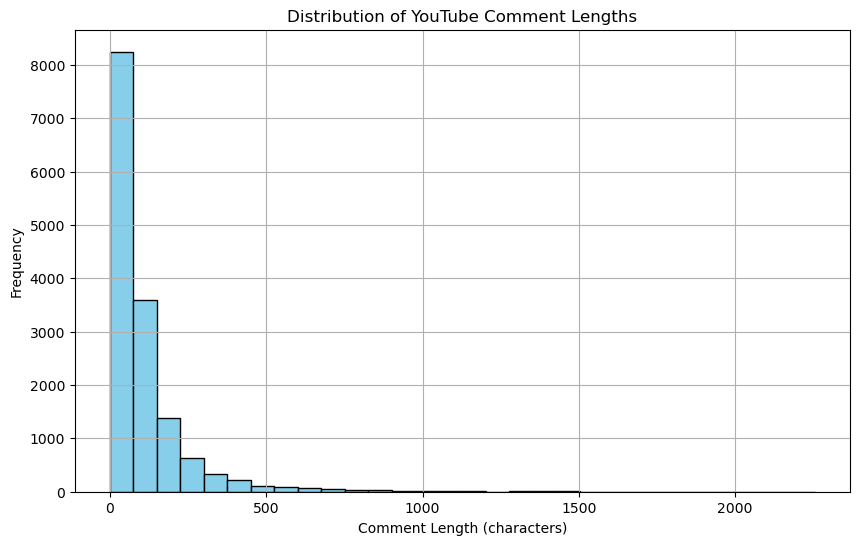

In [30]:
# plot comment length 
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(x['comments_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of YouTube Comment Lengths')
plt.xlabel('Comment Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Looking at comments above 1000 characters

In [32]:
long_comments = x.query("comments_length > 1000")

In [52]:
long_comments['comments']

74                                                                                                                      key takeaways for quick navigation:00:00  the main reason for a productivity system is to efficiently do meaningful tasks and reduce stress, allowing the brain to focus on what it does best.01:27  a calendar is crucial for organizing tasks, events, and blocking out time for important activities.04:31 :e-mail: efficient email management involves a one-touch-to-inbox-zero approach, unsubscribing from unnecessary emails, and centralizing all email accounts.06:10  a comprehensive to-do list is essential, ensuring that 100% of tasks are recorded to avoid unnecessary stress and forgetfulness.09:14  cloud storage, such as google drive, simplifies file management and ensures data security.11:51  the "hermione" layer of productivity focuses on capturing and organizing information from books, articles, and media.14:42  kindle and read-it-later apps like instapaper help organize

In [47]:
df['comments'].loc[42]

"this is fantastic, really great video, very informative and structured. although my main thing is that currently i'm looking for a tool that allows me to connect all these components together. something like notion or motion. also i have adhd so i need as much ai assistance as possible. i'm smart so i do trust in my capabilities to build something from scratch like in notion, but really what i want is something where i can quickly brain dump and it does a lot of the sorting for me. i like the idea of motion because it uses ai to adapt your schedule based on your to do list, but i do want something a little more advanced. i probably just need to tinker a little myself to really know what works, but i don't want to waste time building a system forever just to realise it's not for me. i want to get as close as possible from the start. do you have recommendations? happy to use two but would like them to integrate. main thing is i want to do lists and my calendar to sync. then also having 

"this is fantastic, really great video, very informative and structured. <br> although my main thing is that currently i'm looking for a tool that allows me to connect all these components together. something like notion or motion. also i have adhd so i need as much ai assistance as possible. <br> i'm smart so i do trust in my capabilities to build something from scratch like in notion, but really what i want is something where i can quickly brain dump and it does a lot of the sorting for me. <br> i like the idea of motion because it uses ai to adapt your schedule based on your to do list, but i do want something a little more advanced. i probably just need to tinker a little myself to really know what works, but i don't want to waste time building a system forever just to realise it's not for me. <br> i want to get as close as possible from the start. do you have recommendations? happy to use two but would like them to integrate. main thing is i want to do lists and my calendar to sync. <br> then also having a function for budgeting and outlining bigger goals and then breaking them down. i don't know, just an easy tool for a brain that is wired in tangents and need cross referencing..."

In [50]:
df['comments'].loc[74]

':bullseye: key takeaways for quick navigation:00:00 :robot: the main reason for a productivity system is to efficiently do meaningful tasks and reduce stress, allowing the brain to focus on what it does best.01:27 :calendar: a calendar is crucial for organizing tasks, events, and blocking out time for important activities.04:31 :e-mail: efficient email management involves a one-touch-to-inbox-zero approach, unsubscribing from unnecessary emails, and centralizing all email accounts.06:10 :memo: a comprehensive to-do list is essential, ensuring that 100% of tasks are recorded to avoid unnecessary stress and forgetfulness.09:14 :cloud: cloud storage, such as google drive, simplifies file management and ensures data security.11:51 :books: the "hermione" layer of productivity focuses on capturing and organizing information from books, articles, and media.14:42 :open_book: kindle and read-it-later apps like instapaper help organize and highlight valuable content for future reference.15:22 :

# Video ideas 

In [26]:
df[df['split_comments'].str.contains('video idea',case=False, na=False)].head(15)

,title,split_comments,reordered_scores,reordered_labels,sentiment
747,How to Build Your Ultimate Productivity System,next video idea: how to make breathing productive.,"[0.07707909494638443, 0.11758062988519669, 0.8053402900695801]","['fears', 'frustrations', 'aspirations']",neutral
2229,5 Essential Tips for Long-Lasting Productivity,"@ali abdaal here is a video idea for you - why you should or shouldn't do medical in your college? [given the fact you love math and bio, and biomedical engineering is underrated]","[0.13188423216342926, 0.08569978922605515, 0.7824159860610962]","['fears', 'frustrations', 'aspirations']",positive
3022,"How I Organize My Life - The ""LAZI"" Productivity System","it’s amazing how you come up with so many video ideas, great job ali!","[0.2424195110797882, 0.1261259913444519, 0.6314544677734375]","['fears', 'frustrations', 'aspirations']",positive
3243,My Complete Productivity System,"video idea: what to eat to be more productive? or how can i plan regular eating during my day. of course you can eat while working to be more ""productive"", but i'd like to focus more on nutrition and so :dsorry for my bad english","[0.2333422303199768, 0.1894235759973526, 0.5772342085838318]","['fears', 'frustrations', 'aspirations']",neutral
5146,How I Manage My Time - 10 Time Management Tips,ali's next video idea: productively praying in ramadan,"[0.13499313592910767, 0.10884632915258408, 0.75616055727005]","['fears', 'frustrations', 'aspirations']",neutral
5150,How I Manage My Time - 10 Time Management Tips,"woah ali, just returned from your previous video about time management and i really appreciate your effort of upping the game even you already have same content at hands. and also your actual time distribution in the day or week could be interesting video idea. because myself, a viewer, still can not wrap one's head around how you can absorb/reflex/produce knowledge (read books and blogs on medicine and productivity/tutorials, watch documentaries,...) with many projects (youtube, podcast, courses, website, guitar,... or acts of making plans itself) while handling social interaction (social medias, friends and family, presumably romance too?) in a day or a week of selective amount of hours. oh yeah, with saving lives on the other end of the plate too. that is such incredible!","[0.24213539063930511, 0.26740193367004395, 0.49046263098716736]","['fears', 'frustrations', 'aspirations']",positive
8456,How to Organise your Life - Building a Second Brain,"really loved your take on working on more video projects at a time and make them ""mature"" in a more natural way. i would love to learn more about your video creation process so, because you asked about new video ideas, what about doing a run over your video production process, including some gear recommendations? thanks for your teachings and all the videos :)","[0.173550084233284, 0.10079590976238251, 0.7256540060043335]","['fears', 'frustrations', 'aspirations']",positive
8488,How to Organise your Life - Building a Second Brain,video ideas: :sparkles:- steps to plan effectively- how to balance school and personal lifestyle- how to enter flow state- how to avoid being burnout - how to retain information permanently- how to ask a proper questions,"[0.09270860254764557, 0.08571840077638626, 0.8215729594230652]","['fears', 'frustrations', 'aspirations']",neutral
8519,How to Organise your Life - Building a Second Brain,"i wrote to myself ,,dont forget to suggest a video idea so you can win 100$''but i have 10 ideas:make a video about:1. energy cycles2. sleep cycles3. parkinson's law 4. kidlin's law 5. gilbert's law 6. wilson's law ( please maie a video about it!)7. ways to make money as a student8. how to create strong habits (i think you have a video on this, but i want something more detailed) 9 my professional history (jobs you had in the past, from start to now, and your future plans)10. my investing principlesi hope i win at least 100$ :rolling_on_the_floor_laugh

In [61]:
group_title = df.groupby(['title'])

In [66]:
def top(df,n=10,column='frustrations_score'):
    return df.sort_values(column, ascending=False)

In [67]:
group_title.apply(top)

/var/folders/dl/xk3h69fs1n98s7d_7v_3q5pc0000gn/T/ipykernel_6816/1817479157.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_title.apply(top)


title  \
title                                                                                                                              
12 Productivity Myths Wasting Your Time                      10346                       12 Productivity Myths Wasting Your Time   
                                                             10379                       12 Productivity Myths Wasting Your Time   
                                                             10510                       12 Productivity Myths Wasting Your Time   
                                                             10444                       12 Productivity Myths Wasting Your Time   
                                                             10571                       12 Productivity Myths Wasting Your Time   
...                                                                                                                          ...   
Why You’re Always Distracted - 5 Mistakes Ruining Your Focus 14465  Why You’re Always Distracted - 5 Mistakes Ruining Your Focus   
                                                             14357  Why You’re Always Distracted - 5 Mistakes Ruining Your Focus   
                                                             14742  Why You’re Always Distracted - 5 Mistakes Ruining Your Focus   
                                                             14456  Why You’re Always Distracted - 5 Mistakes Ruining Your Focus   
                                                             14385  Why You’re Always Distracted - 5 Mistakes Ruining Your Focus   

                                                                                                                                                                                                                                         comments  \
title                                                                                                                                                                                                                                               
12 Productivity Myths Wasting Your Time                      10346                                                                                                   19 minutes of ranting that could've been replaced by "just use common sense"   
                                                             10379                                                                                                   12:41 it's a life of constant interruption, it's like working on an er team.   
                                                             10510                                                      you provide great information but i can only take about 3 minutes of your style of presentation before i have to tap out.   
                                                             10444                                                             10:25  "... the real problem with trying to get things done is when you fricking hate doing the thing."  lol. yes.   
                                                             10571  these past few days i really wanted to work on my personal projects, in the end however, i ended up wasting so much time on my phone. maybe this video might help, thank you!   
...                                                                                                                                                                                                                                           ...   
Why You’re Always Distracted - 5 Mistakes Ruining Your Focus 14465                                                                                 love the idea of changing my iphone lock screen wallpaper to an inspirational reminder quote !   
                                                             14357                                                      brilliant video. distraction from fear, i can relate to and i am going to exercis

In [57]:
video_analysis = group_title['reordered_labels'].value_counts().unstack()

In [58]:
video_analysis

reordered_labels,"['fears', 'frustrations', 'aspirations']"
title,
12 Productivity Myths Wasting Your Time,313
5 Essential Tips for Long-Lasting Productivity,1367
5 Small Changes to Supercharge Your Focus,164
7 Actionable Ways to Achieve More in Life,417
How I Manage My Time - 10 Time Management Tips,1870
"How I Organize My Life - The ""LAZI"" Productivity System",708
How to Be Effortlessly Disciplined: 5 Mindset Shifts,447
How to Beat Procrastination,1195
How to Build Your Ultimate Productivity System,992
